# Big Mart Sales Prediction

### Overview
        - Structure of a Maching Learning Pipeline
        - Build an end-to-end ML pipeline on a real-world data
        - Train a Random Forest Regressor for sales prediction

### Importing Essential Libraries

In [122]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce 

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

%matplotlib inline

### Loading the data

In [78]:
# Importing the training dataset
train_df = pd.read_csv('datasets/train_data.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [79]:
# shape of the training dataset
train_df.shape

(8523, 12)

In [80]:
# Importing the test dataset
test_df = pd.read_csv('datasets/test_data.csv')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [81]:
# Shape of the test dataset
test_df.shape

(5681, 11)

## Data Exploration and Preprocessing

In [82]:
# Examining the features' info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [83]:
# Examining the numerical features' distribution
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


#### Handling missing values

In [84]:
# Checking for missing values

# we can see that item weight and outlet size have missing values

train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [87]:
# Since item weight is a continous value, the missing values can be imputed by median as follows

train_df['Item_Weight'].fillna(train_df['Item_Weight'].median(), inplace=True)

# Checking if there are missing values in item weight
train_df['Item_Weight'].isnull().sum()

0

In [88]:
# Since outlet size is a categorical value, the missing values can be imputed using the mode as follows

train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0], inplace=True)

# checking if there are missing values in outlet size
train_df['Outlet_Size'].isnull().sum()

0

In [89]:
# Checking overall missing values
train_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Handling Categorical Data

In [93]:
# Transforming categorical features into binary features

OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'],use_cat_names=True)

# Encode the categorical variables
train_df = OHE.fit_transform(train_data)
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.30,1,0,0,0,0,0.016047,1,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,DRC01,5.92,0,1,0,0,0,0.019278,0,1,...,0,0,0,1,0,0,1,0,0,443.4228
2,FDN15,17.50,1,0,0,0,0,0.016760,0,0,...,0,0,1,0,0,1,0,0,0,2097.2700
3,FDX07,19.20,0,1,0,0,0,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,NCD19,8.93,1,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,0,0,0,994.7052


In [95]:
# Since item weight is a continous value, the missing values can be imputed by median as follows

train_df['Item_Weight'].fillna(train_df['Item_Weight'].median(), inplace=True)

# Checking if there are missing values in item weight
train_df['Item_Weight'].isnull().sum()
train_df.isna().sum()

Item_Identifier                    0
Item_Weight                        0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_LF                0
Item_Fat_Content_reg               0
Item_Visibility                    0
Item_Type_Dairy                    0
Item_Type_Soft Drinks              0
Item_Type_Meat                     0
Item_Type_Fruits and Vegetables    0
Item_Type_Household                0
Item_Type_Baking Goods             0
Item_Type_Snack Foods              0
Item_Type_Frozen Foods             0
Item_Type_Breakfast                0
Item_Type_Health and Hygiene       0
Item_Type_Hard Drinks              0
Item_Type_Canned                   0
Item_Type_Breads                   0
Item_Type_Starchy Foods            0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_MRP                           0
Outlet_Identifier_OUT049           0
Outlet_Identifier_OUT018           0
O

## Feature Scaling

In [96]:
# defining a standard scaler
scaler = StandardScaler()

In [97]:
# Fitting our feature to the scaler
scaler.fit(np.array(train_df['Item_MRP']).reshape(-1,1))

# transforming the feature 
train_df['Item_MRP'] = scaler.transform(np.array(train_df['Item_MRP']).reshape(-1,1))

In [98]:
train_df.isna().sum()

Item_Identifier                    0
Item_Weight                        0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_LF                0
Item_Fat_Content_reg               0
Item_Visibility                    0
Item_Type_Dairy                    0
Item_Type_Soft Drinks              0
Item_Type_Meat                     0
Item_Type_Fruits and Vegetables    0
Item_Type_Household                0
Item_Type_Baking Goods             0
Item_Type_Snack Foods              0
Item_Type_Frozen Foods             0
Item_Type_Breakfast                0
Item_Type_Health and Hygiene       0
Item_Type_Hard Drinks              0
Item_Type_Canned                   0
Item_Type_Breads                   0
Item_Type_Starchy Foods            0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_MRP                           0
Outlet_Identifier_OUT049           0
Outlet_Identifier_OUT018           0
O

# Building Model

In [99]:
# Splitting the labels and features
train_X = train_df.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
train_Y = train_df['Item_Outlet_Sales']

In [100]:
# Randomly splitting the data into train and testing subsets (80:20 ratio)
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y, test_size=0.2, random_state=0, shuffle=True)

In [101]:
# Shapes of train and test set splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape 

((6818, 46), (1705, 46), (6818,), (1705,))

### Linear Regression

In [102]:
# Defining linear regression model
lr = LinearRegression()

# fitting training data into the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# Prediction
train_data_prediction = lr.predict(train_x)
test_data_prediction = lr.predict(test_x)

In [105]:
# Root mean square error
print('RMSE on training data:', mean_squared_error(train_y, train_data_prediction)**0.5)
print('RMSE on testing data:', mean_squared_error(test_y, test_data_prediction)**0.5)

RMSE on training data: 1125.998391717315
RMSE on testing data: 1132.7390127833305


### Random Forest Regressor

In [106]:
# Difining the random forest regressor
rf = RandomForestRegressor(max_depth=10)

# Fitting the model with training data
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [107]:
# Running predictions on training data
train_rf_prediction = rf.predict(train_x)

# Runnign predictions on testing data
testing_rf_prediction = rf.predict(test_x)

In [108]:
# Printing RMSE for both the above predictions
print('RMSE on the training data:', mean_squared_error(train_rf_prediction, train_y)**0.5)
print('RMSE on the testing data:', mean_squared_error(test_y, testing_rf_prediction)**0.5)

RMSE on the training data: 905.2103225335001
RMSE on the testing data: 1100.8856479829071


#### Feature Importance

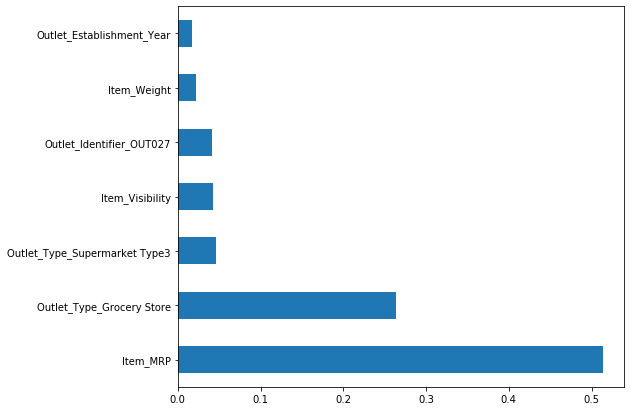

In [113]:
# Plotting the 7 most important features
plt.figure(figsize=(8,7))
feature_importances = pd.Series(rf.feature_importances_, index=train_x.columns)
feature_importances.nlargest(7).plot(kind='barh');

In [114]:
# Checking the performance of a random forest on these 7 most important features
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# Test data with 7 most important features
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]


In [115]:
# Defining a random forest model
rf_ifeatures = RandomForestRegressor(max_depth=10, random_state=2)

# fit the model with the training data
rf_ifeatures.fit(train_x_if, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [117]:
# predict the target on the training and test data
predict_train_if = rf_ifeatures.predict(train_x_if)
predict_test_if = rf_ifeatures.predict(test_x_if)

In [118]:
# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_if)**(0.5))

RMSE on train data:  910.6255115107289
RMSE on test data:  1103.2590396262888


## Build ML Pipeline

In this section, the model will be built to a pipeline using most important features        

#### Pipeline Design

        - Create the required binary features
        - Perform required data preprocessing and transformations
        - Build a model to predict the sales


In [120]:
data = pd.read_csv("datasets/train_data.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [121]:
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

In [123]:
# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        
        return x_dataset

In [124]:
# pre-processsing step
# Drop the columns - 
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

In [125]:
# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
model_pipeline.predict(train_x)

array([4348.01437159,  693.40276088, 2323.35268531, ..., 1300.83665376,
       1508.86795688, 1152.35475793])

In [127]:
# read the test data
test_data = pd.read_csv('datasets/test_data.csv')

# predict target variables on the test data 
model_pipeline.predict(test_data)

array([1646.0548363 , 1305.4298012 ,  658.42325097, ..., 1848.60226305,
       3959.67937864, 1384.01466986])